In [64]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
with open(r"./girl.bmp", "rb") as fp:
    image = np.fromfile(fp, dtype = np.uint8)

In [7]:
image

array([ 66,  77,  54, ...,  44,  18, 255], dtype=uint8)

In [8]:
image.size

9437238

In [11]:
picture = Image.open(r"./girl.bmp")

In [13]:
picture.width, picture.height

(2048, 1152)

In [15]:
# BMP pixel arrays

image[54:]

array([ 73, 203, 203, ...,  44,  18, 255], dtype=uint8)

In [17]:
len(image[54:]) / picture.width

4608.0

In [27]:
picture.width * picture.height

2359296

In [28]:
picture.width * picture.height * 4

9437184

In [40]:
len(image[54:]) / 4

2359296.0

In [75]:
pixels = np.array(np.split(image[54:], 2359296))

In [55]:
pixsums = pixels.sum(axis = 1)

In [56]:
pixsums.size

2359296

In [57]:
pixsums.size / picture.width

1152.0

In [59]:
# woohooo motherfuckers!!

picture.height * picture.width == pixsums.size

True

In [66]:
pic_matrix = ((pixsums - 255) / 3).reshape(picture.height, picture.width)

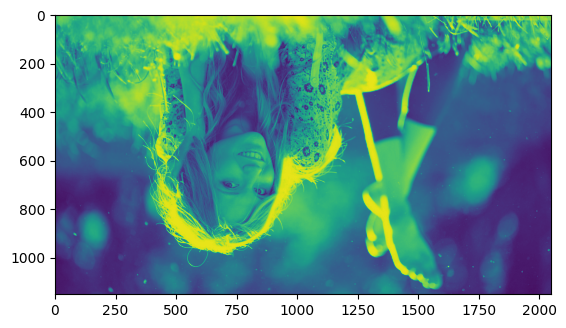

In [67]:
plt.imshow(pic_matrix)
plt.show()

In [77]:
np.flip(pixels).sum(axis = 1) - 255

array([ 93,  96,  96, ..., 482, 479, 479], dtype=uint32)

In [79]:
revmat = (np.flip(pixels).sum(axis = 1) - 255).reshape(picture.height, picture.width)

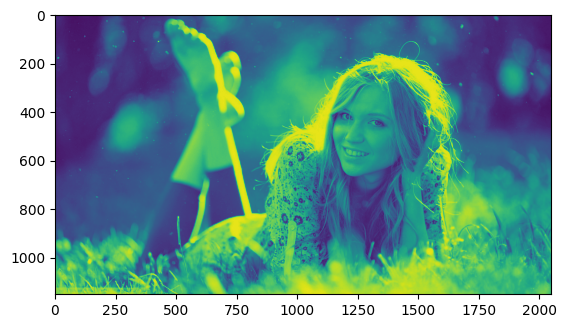

In [81]:
plt.imshow(revmat)
plt.show()